In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from autograd import grad
from autograd import numpy as np

from scipy import optimize as opt
from matplotlib import pyplot as plt

In [3]:
import initdirs

from pdata.optimize import eval_grad_on_meshgrid
from pdata.visualize import plot_contour, plot_surface, plot_grad_as_vector_field

$f(x_1, x_2) = x_1^2 + x_2^2 + sin(x_1 + 1.5) - 2 sin(x_1 x_2) + x_2$

In [4]:
x_range = np.arange(-3, 3, 0.25)
y_range = np.arange(-3, 3, 0.25)
domain_xy = np.meshgrid(x_range, y_range)

def func(x):
    return x[0]**2 + x[1]**2 + np.sin(x[0] + 1.5) - 2 * np.sin(x[0]*x[1]) +  x[1]

func_z = func(domain_xy)

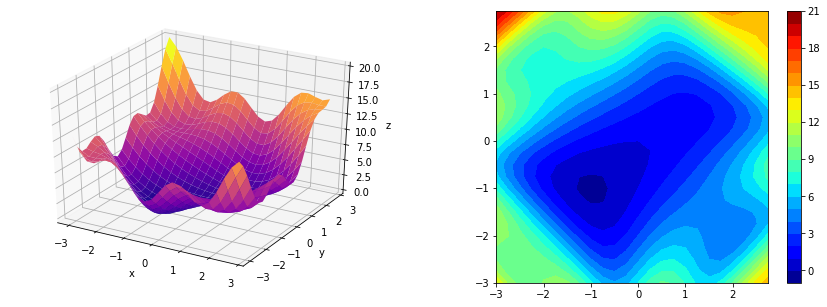

In [5]:
fig_func = plt.figure(figsize=(15, 5))

plot_surface(domain_xy[0], domain_xy[1], func_z, fig=fig_func, subplot_pos=121, cmap='plasma')

plot_contour(domain_xy[0], domain_xy[1], func_z, fig=fig_func, subplot_pos=122, levels=20, cmap='jet')

In [6]:
res = opt.minimize(func, x0=[1., 1.])
print(res)

      fun: -0.20489145971261613
 hess_inv: array([[ 0.32158404, -0.06062539],
       [-0.06062539,  0.29020681]])
      jac: array([ 3.12924385e-06, -2.81631947e-06])
  message: 'Optimization terminated successfully.'
     nfev: 45
      nit: 10
     njev: 15
   status: 0
  success: True
        x: array([-0.9823316 , -1.02502735])


In [7]:
func_grad = grad(func)

grad_x, grad_y = eval_grad_on_meshgrid(func_grad, domain_xy[0], domain_xy[1])

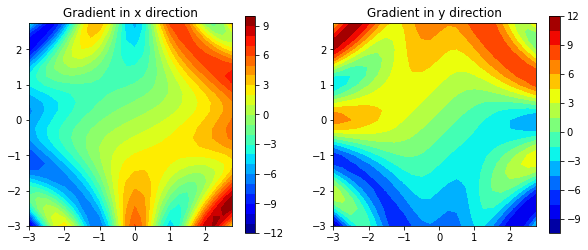

In [8]:
grad_fig = plt.figure(figsize=(10, 4))

plot_contour(domain_xy[0], domain_xy[1], grad_x, fig=grad_fig, subplot_pos=121, cmap='jet', levels=20)
_ = plt.title('Gradient in x direction')

plot_contour(domain_xy[0], domain_xy[1], grad_y, fig=grad_fig, subplot_pos=122, cmap='jet', levels=20)
_ = plt.title('Gradient in y direction')

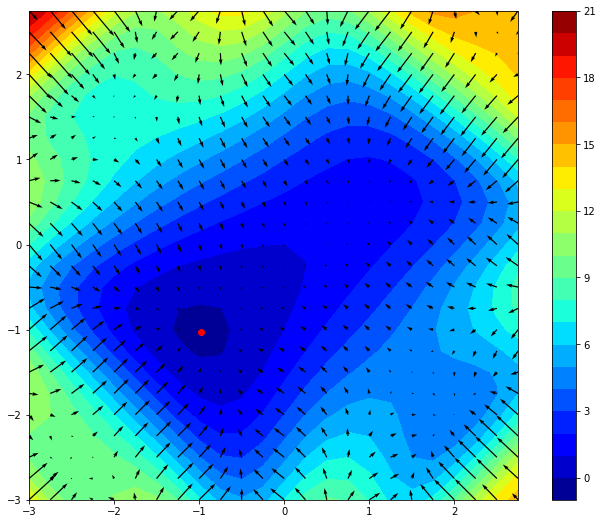

In [9]:
fig = plt.figure(figsize=(12, 9))

plot_contour(domain_xy[0], domain_xy[1], func_z, fig=fig, cmap='jet', levels=20)

plot_grad_as_vector_field(x_range, y_range, -grad_x, -grad_y, fig=fig)

_ = plt.scatter(res.x[0], res.x[1], color='r')